### Wczytanie danych i bibliotek

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pycaret

from pycaret.classification import *
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import normalize

In [3]:
dane = pd.read_csv('hotel_bookings.csv')
dane.head()

dane_eda = dane.copy()

In [4]:
dane.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [5]:
dane.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


### EDA

#### Statystyki opisowe

In [6]:
def opis(kolumna):
    print(f"Średnia dla {kolumna}: ", np.round(np.mean(dane[kolumna]), decimals=2))
    print(f"Odchylenie standardowe dla {kolumna}: ", np.round(np.std(dane[kolumna]), decimals=2))
    print(f"Wariancja dla {kolumna}: ", np.round(np.var(dane[kolumna]), decimals=2))
    print(f"Kwantyle dla {kolumna}: ", np.quantile(dane[kolumna], q=np.array([0.25, 0.5, 0.75])))
    print(f"Minimum dla {kolumna}: ", np.round(np.min(dane[kolumna]), decimals=2))
    print(f"Mediana dla {kolumna}: ", np.round(np.median(dane[kolumna]), decimals=2))
    print(f"Maksimum dla {kolumna}: ", np.round(np.max(dane[kolumna]), decimals=2))
    print(f"Najczęściej występująca wartość dla {kolumna}:  {dane[kolumna].mode()[0]}")

##### lead_time

Na początek zajmiejmy się zmienną lead_time mówiącą nam o tym na ile dni przed planowanym przyjazdem dokonowana była rezerwacja

##### Liczność oraz podstawowe statystyki

In [7]:
print("3 najczęściej występujące wartości dla",dane_eda['lead_time'].value_counts().head(3))
print()
opis('lead_time')

3 najczęściej występujące wartości dla lead_time
0    6345
1    3460
2    2069
Name: count, dtype: int64

Średnia dla lead_time:  104.01
Odchylenie standardowe dla lead_time:  106.86
Wariancja dla lead_time:  11419.63
Kwantyle dla lead_time:  [ 18.  69. 160.]
Minimum dla lead_time:  0
Mediana dla lead_time:  69.0
Maksimum dla lead_time:  737
Najczęściej występująca wartość dla lead_time:  0


Zmienna jest typu int64, ma wartości w zakresie od 0 do 737. Duża przedział sprawia, że najłatwiej będzie powiedzieć coś patrząc na wizualizację.

##### Wizualiacje

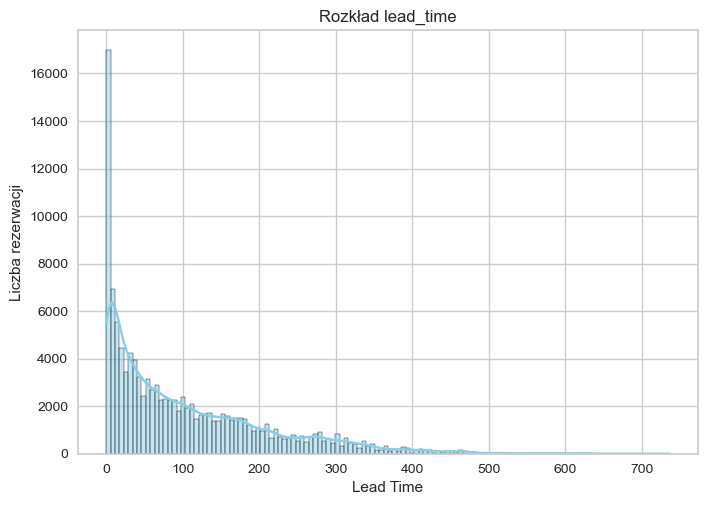

In [8]:
sns.histplot(dane_eda['lead_time'], kde=True, color='skyblue')
plt.title("Rozkład lead_time")
plt.xlabel("Lead Time")
plt.ylabel("Liczba rezerwacji")
plt.show()

Wykres powyżej przedstawia rozkład zmiennej lead_time, która wskazuje czas (w dniach) pomiędzy dokonaniem rezerwacji a datą przyjazdu gościa.
Wartości na osi x reprezentują długości oczekiwania na przyjazd, a wysokość słupków pokazuje, jak często dany czas oczekiwania występuje w zbiorze danych. Możemy zauważyć, że znacząca liczba gości rezerwuje pokój do 10 dni (pierwszy słupek) przed planowaną datą przyjazdu oraz, że wraz ze wzrostem czasu od rezerwacji do przyjazdu maleje liczba osób dokonująca tych rezerwacji. W dalszej części analizy ze względu na cel predykcyjne będzie można przyjrzeć się sytuacji gdy ktoś wprowadza się od razu w dniu rezerwacji szczególnie gdy rezerwacji dokonuje bezpośrednio w hotelu, ponieważ może to nie nieść znaczącej dla nas informacji.

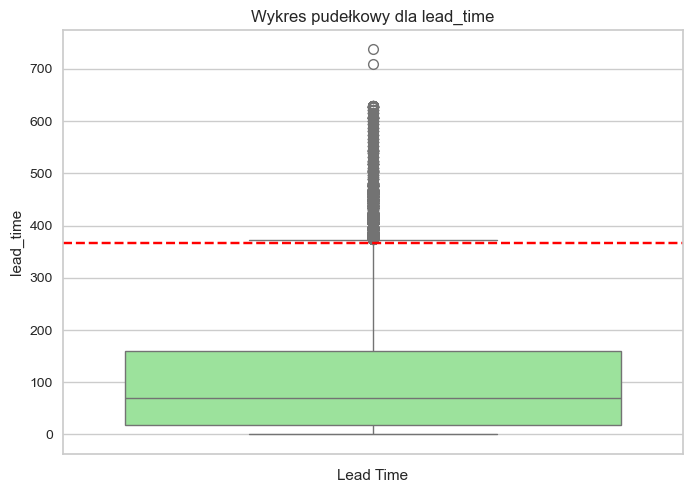

In [9]:
sns.boxplot(y=dane_eda['lead_time'], color='lightgreen', )
plt.axhline(y=366, color='red', linestyle='--')
plt.title("Wykres pudełkowy dla lead_time")
plt.xlabel("Lead Time")
plt.show()

Wykres powyżej ponownie przedstawia rozkład zmiennej lead_time. Czerwoną przerywaną linią zaznaczony jest czas poprzedzający przyjazd równy 366 dni ( ze względu na to, że rok 2016 był przestępny). Zauważmy, że linia ta niemal, że pokrywa końcówkę wąsa odpowiadającą wartości maksymalnej, która nie jest odstająca. Może to oznaczać, że nietypowym zachowaniem jest rezerwacja hotelu na dłużej niż rok przed przyjazdem. Możemy również zauważyć, że połowa rezerwacji odbywa się na około 2 miesiące przed przyjazdem.

#### is_canceled

Teraz przyjrzymy się zmiennej, którą będziemy predyktować. Zaczniemy od sprawdzenia typu zmiennej, liczność klas oraz sprawdzeniu czy występują braki danych.

In [10]:
dane_eda['is_canceled'].dtypes

dtype('int64')

In [11]:
print(dane_eda['is_canceled'].value_counts())

is_canceled
0    75166
1    44224
Name: count, dtype: int64


Zmienna jest typu int64 oraz jest w miarę zrównoważona.

##### Wizualizacje

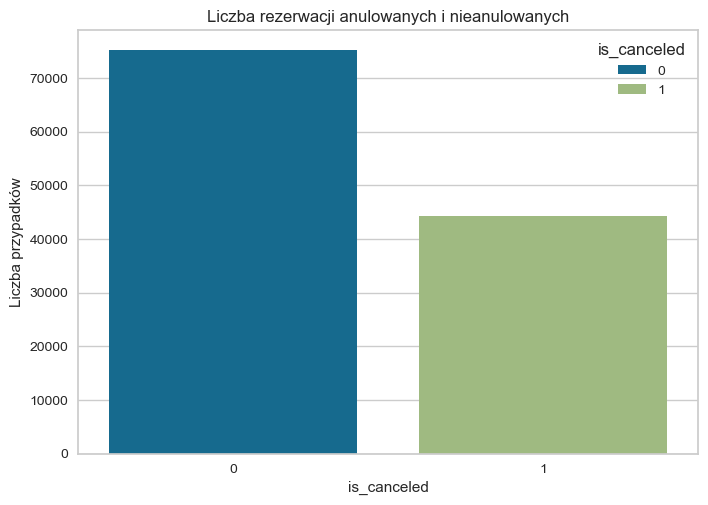

In [12]:
sns.countplot(x='is_canceled', data=dane_eda, hue='is_canceled')
plt.title('Liczba rezerwacji anulowanych i nieanulowanych')
plt.xlabel('is_canceled')
plt.ylabel('Liczba przypadków')
plt.show()

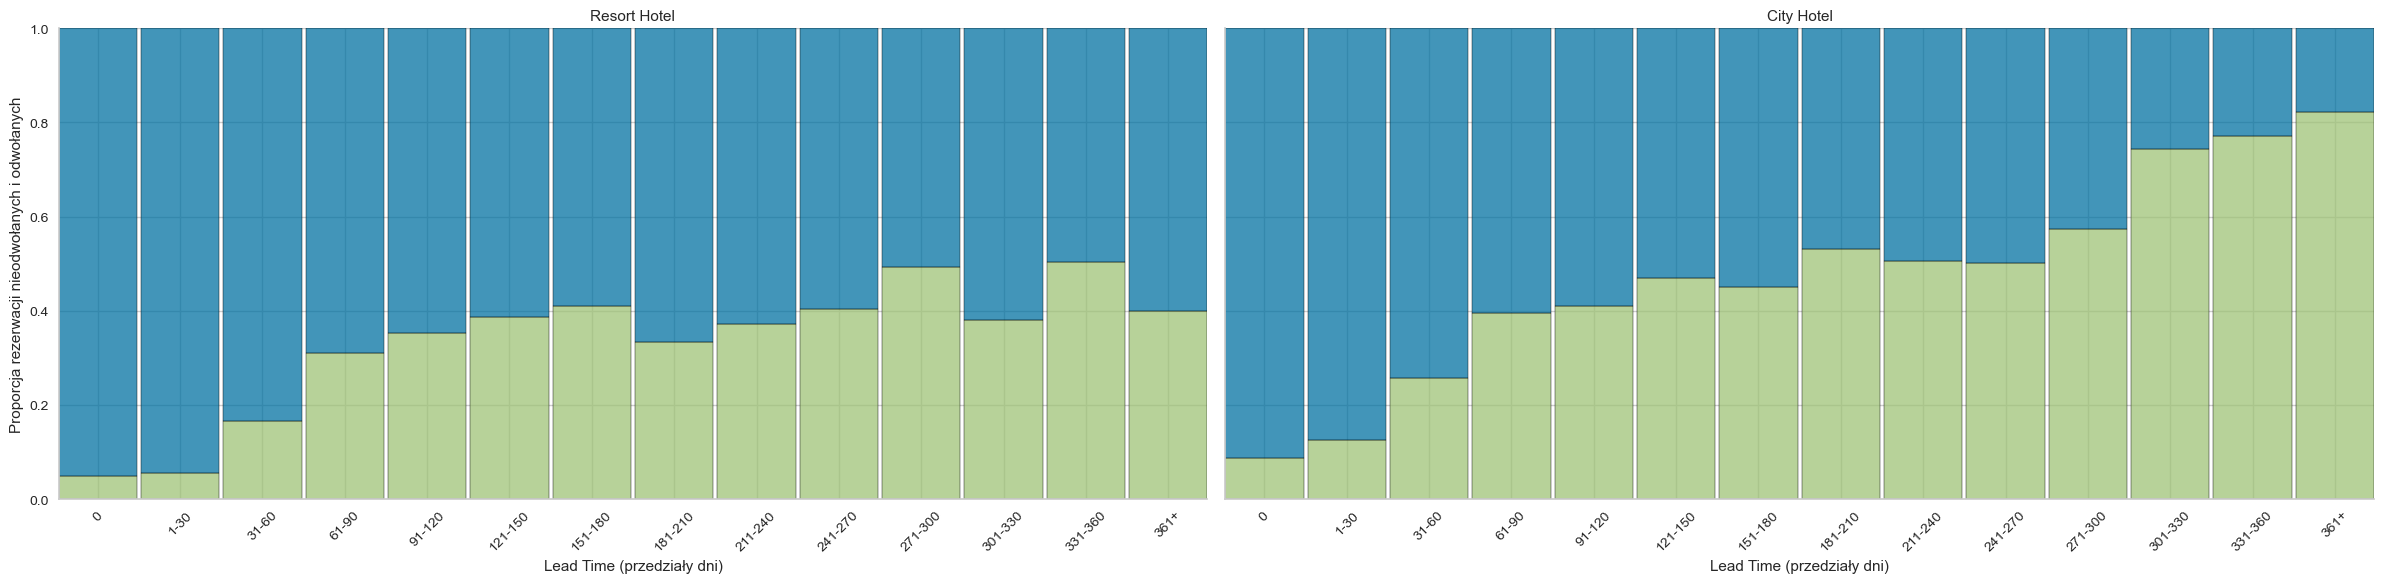

In [13]:
bins = [-1, 0] + list(range(1, 366, 30))
labels = ['0'] + [f'{i}-{i+29}' for i in range(1, 336, 30)] + ['361+']

g = sns.FacetGrid(dane_eda, col='hotel', height=6, aspect=2, col_wrap=2)
g.map_dataframe(
    sns.histplot,
    x=pd.cut(dane['lead_time'], bins=bins, labels=labels, include_lowest=True),
    hue='is_canceled',
    multiple='fill',
    stat='probability',
    shrink=0.95,
)

g.set_titles(col_template="{col_name}")
g.set_xticklabels(rotation=45)
g.set_axis_labels("Lead Time (przedziały dni)", "Proporcja rezerwacji nieodwołanych i odwołanych")
plt.tight_layout()
plt.show()

Powyższe wykresy przedstawiają jak w zależności od hotelu wyglądają proporcję anulowania (anulowanie kolorem jasnozielonym, nieanulowanie kolorem niebieskim) w okresach 30 dniowych. Wydzielone zostało również 0, ze względu na to, że często mogłobyć to bezpośrednie wprowadzenie do hotelu. W przypadku obu hoteli jeśli rezerwacja odbyła się na od 1 do 30 dni to w przypadku hotelu w mieście tylko 15% rezerwacji została anulowana a jeśli ktoś wprowadzał się w dniu rezerwacji to anulowane było raptem 10% rezerwacji. W przypadku hotelu wypoczynkowego sytuacja jest nawet lepsza bo dla okresu od dnia 0 do 30 anulowanych jest tylko około 5% rezerwacji. Jeśli rezerwacja odbyła się na więcej dni przed przyjazdem to w obu przypadkach proporcja anulowanchy rezerwacji się zwiększa. W przypadku hotelu wypoczynkowego oscyluje wokół 40% zaś w przypadku hotelu w mieście rośnie bez przerwy osiągając około 80% dla dni 361+. Może być to jednak spowodowane małą ilością danych dla, których lead_time był aż tak wysoki.

In [14]:
corr = dane.select_dtypes(include=[np.number]).corr()
df = corr

In [15]:
for i in range(len(df)):
    df.iloc[i, i] = 0

# Znalezienie 20 największych wartości bezwzględnych
largest_abs_values = df.abs().unstack().sort_values(ascending=False).head(20)

# Wyniki
print("DataFrame z przekątną równą 0:")
print(df)
print("\n20 największych wartości bezwzględnych:")
print(largest_abs_values)

DataFrame z przekątną równą 0:
                                is_canceled  lead_time  arrival_date_year  \
is_canceled                        0.000000   0.293123           0.016660   
lead_time                          0.293123   0.000000           0.040142   
arrival_date_year                  0.016660   0.040142           0.000000   
arrival_date_week_number           0.008148   0.126871          -0.540561   
arrival_date_day_of_month         -0.006130   0.002268          -0.000221   
stays_in_weekend_nights           -0.001791   0.085671           0.021497   
stays_in_week_nights               0.024765   0.165799           0.030883   
adults                             0.060017   0.119519           0.029635   
children                           0.005048  -0.037622           0.054624   
babies                            -0.032491  -0.020915          -0.013192   
is_repeated_guest                 -0.084793  -0.124410           0.010341   
previous_cancellations             0.110133  

In [16]:
dane.drop(columns=['country', 'company', 'agent', 'reservation_status', 'reservation_status_date', 'arrival_date_year', 'arrival_date_week_number', 'reserved_room_type', 'market_segment'], inplace=True)
dane.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_month',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'distribution_channel', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'assigned_room_type',
       'booking_changes', 'deposit_type', 'days_in_waiting_list',
       'customer_type', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests'],
      dtype='object')

In [17]:
dane.dropna(subset=['children'], inplace=True)

In [18]:
# columns_to_category = [
#     "hotel", "arrival_date_month", "arrival_date_day_of_month",    "children", "adults", "babies", "meal",    
#     "distribution_channel", "reserved_room_type", "assigned_room_type", "deposit_type", "customer_type", 
#     "required_car_parking_spaces",    "total_of_special_requests", "reservation_status"
# ]

# columns_to_int = [
#     'lead_time', 'arrival_date_month', 'arrival_date_day_of_month',
#     'stays_in_weekend_nights', 'stays_in_week_nights', 'children',
#     'adults', 'babies', 'previous_cancellations',
#     'previous_bookings_not_canceled', 'booking_changes', 'days_in_waiting_list',
#     'adr', 'required_car_parking_spaces', 'total_of_special_requests'
# ]

# for col in columns_to_int:

#     dane[col] = dane[col].astype('int64')

# for col in columns_to_category:

#     dane[col] = dane[col].astype('category')


ValueError: invalid literal for int() with base 10: 'July'

In [19]:
dane['is_repeated_guest'] = dane['is_repeated_guest'].astype('bool')
dane['is_canceled'] = dane['is_canceled'].astype('bool')

In [20]:
df = pd.get_dummies(dane, drop_first=True)

In [22]:
df.shape
df.head()

,is_canceled,lead_time,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,...,assigned_room_type_H,assigned_room_type_I,assigned_room_type_K,assigned_room_type_L,assigned_room_type_P,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
0,False,342,1,0,0,2,0.0,0,False,0,...,False,False,False,False,False,False,False,False,True,False
1,False,737,1,0,0,2,0.0,0,False,0,...,False,False,False,False,False,False,False,False,True,False
2,False,7,1,0,1,1,0.0,0,False,0,...,False,False,False,False,False,False,False,False,True,False
3,False,13,1,0,1,1,0.0,0,False,0,...,False,False,False,False,False,False,False,False,True,False
4,False,14,1,0,2,2,0.0,0,False,0,...,False,False,False,False,False,False,False,False,True,False


### Analiza korelacji

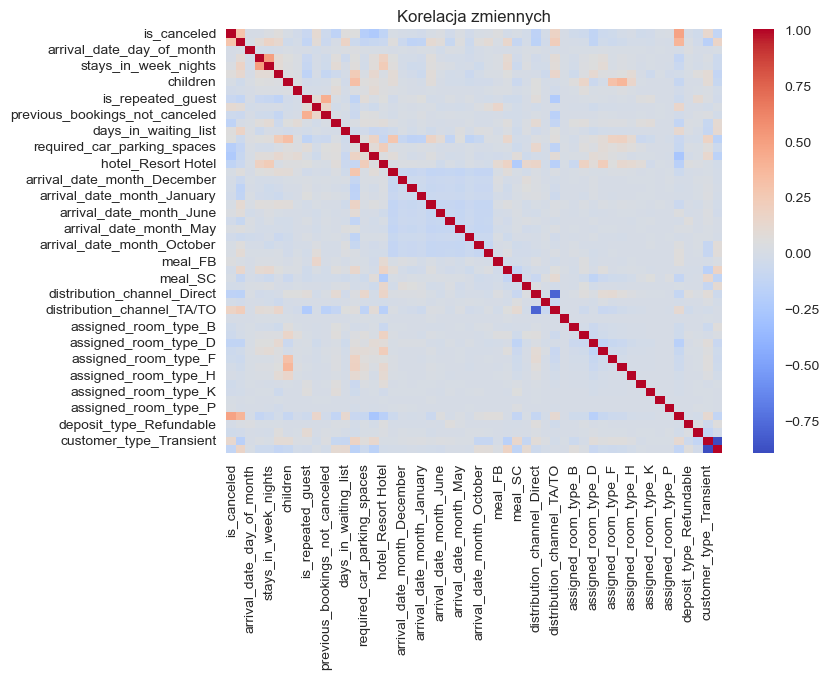

In [23]:
df_corr = df.corr()

w1 = sns.heatmap(df_corr, cmap='coolwarm')
w1.set_title('Korelacja zmiennych')
plt.show()

In [24]:
pd.set_option('display.max_rows', None)
cancel_corr = df.corr()["is_canceled"]
cancel_corr.abs().sort_values(ascending=False)[1:]

deposit_type_Non Refund           0.481488
lead_time                         0.293177
total_of_special_requests         0.234706
required_car_parking_spaces       0.195492
distribution_channel_TA/TO        0.176056
distribution_channel_Direct       0.151609
booking_changes                   0.144371
hotel_Resort Hotel                0.136505
customer_type_Transient           0.133170
assigned_room_type_D              0.128017
customer_type_Transient-Party     0.124231
previous_cancellations            0.110140
is_repeated_guest                 0.084788
assigned_room_type_E              0.064784
adults                            0.059990
previous_bookings_not_canceled    0.057355
days_in_waiting_list              0.054193
assigned_room_type_C              0.053872
adr                               0.047622
assigned_room_type_F              0.045971
assigned_room_type_I              0.040783
meal_FB                           0.038832
customer_type_Group               0.038696
assigned_ro

In [37]:
for i in range(len(df_corr)):
    df_corr.iloc[i, i] = 0

largest_abs_values = df_corr.abs().unstack().sort_values(ascending=False).head(50)

print("\n20 największych wartości bezwzględnych:")
print(largest_abs_values.iloc[::2,])


20 największych wartości bezwzględnych:
customer_type_Transient      customer_type_Transient-Party     0.895584
distribution_channel_TA/TO   distribution_channel_Direct       0.797499
stays_in_weekend_nights      stays_in_week_nights              0.498967
deposit_type_Non Refund      is_canceled                       0.481488
is_repeated_guest            previous_bookings_not_canceled    0.418056
lead_time                    deposit_type_Non Refund           0.380174
children                     assigned_room_type_G              0.372458
                             adr                               0.324854
                             assigned_room_type_F              0.305917
lead_time                    is_canceled                       0.293177
arrival_date_month_August    adr                               0.274887
total_of_special_requests    deposit_type_Non Refund           0.268029
                             is_canceled                       0.234706
hotel_Resort Hotel     

### Detekcja anomalii

In [25]:
from pycaret.anomaly import *
exp_ano101 = setup(df, session_id = 123, use_gpu=True)

,Description,Value
0,Session id,123
1,Original data shape,"(119386, 52)"
2,Transformed data shape,"(119386, 52)"
3,Numeric features,14
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,True


In [26]:
iforest = create_model('iforest')
print(iforest)

IForest(behaviour='new', bootstrap=False, contamination=0.05,
    max_features=1.0, max_samples='auto', n_estimators=100, n_jobs=-1,
    random_state=123, verbose=0)


In [ ]:
#svm = create_model('svm', fraction = 0.025)
#print(svm)

In [27]:
iforest_results = assign_model(iforest)
iforest_results.head()

,is_canceled,lead_time,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,...,assigned_room_type_K,assigned_room_type_L,assigned_room_type_P,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,Anomaly,Anomaly_Score
0,False,342,1,0,0,2,0.0,0,False,0,...,False,False,False,False,False,False,True,False,1,0.012845
1,False,737,1,0,0,2,0.0,0,False,0,...,False,False,False,False,False,False,True,False,1,0.024943
2,False,7,1,0,1,1,0.0,0,False,0,...,False,False,False,False,False,False,True,False,0,-0.031925
3,False,13,1,0,1,1,0.0,0,False,0,...,False,False,False,False,False,False,True,False,0,-0.078485
4,False,14,1,0,2,2,0.0,0,False,0,...,False,False,False,False,False,False,True,False,0,-0.096751


In [28]:
df = df[iforest_results['Anomaly'] == 0]

In [29]:
for col in df.select_dtypes(include=[np.number]).columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

In [30]:
# Normalizacja kolumnowa (min-max scaling)
dane_norm = df.select_dtypes(include=['int64', 'float64']).apply(
    lambda col: (col - col.min()) / (col.max() - col.min())
)

# Usunięcie kolumny 'is_canceled'
dane_norm = pd.concat([df[df.select_dtypes(include='bool').columns ], dane_norm], axis=1)
dane_norm.drop(columns='is_canceled', inplace=True)




In [31]:
df.drop( dane_norm.var().nsmallest(15).index , axis=1, inplace=True)

### Modele

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.pipeline import make_pipeline


Podział zbioru danych na treningowy i testowy

In [34]:
X = df.drop(columns = 'is_canceled').values
y = df['is_canceled'].values
print(X.shape, y.shape)

(53760, 36) (53760,)


In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 123, stratify = y)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(48384, 36) (5376, 36) (48384,) (5376,)


Utworzenie instancji klasyfikatorów

In [ ]:
names = ['Logistic Regression', 'SVM', 'Naive Bayes', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 'AdaBoost']
classifiers = [LogisticRegression(), SVC(), GaussianNB(), DecisionTreeClassifier(), RandomForestClassifier(), GradientBoostingClassifier(), AdaBoostClassifier()]

Walidacja krzyżowa

In [38]:
cv = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 123)

Hiperparamrtry modeli

In [ ]:
grid_params_clf = ['LogisticRegression': {'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2']}, 'SVM': {'kernel': ['linear', 'rbf']}, 'Naive Bayes':{}, 'DecisionTreeClassifier': {'max_depth': [13, 15], 'min_samples_split': [2, 6, 10], 'min_samples_leaf': [2, 4, 5]}, 'RandomForestClassifier': {'n_estimators': [300, 500], 'max_depth': [5, 9], 'min_samples_split': [30, 60], 'min_samples_leaf': [20, 25]}, 'GradientBoostingClassifier': {'n_estimators': [400, 500], 'learning_rate': [0.01, 0.1], 'max_depth': [13, 15], 'min_samples_split': [30, 60], 'min_samples_leaf': [20, 25]}, 'AdaBoostClassifier': {'n_estimators': [400, 500], 'learning_rate': [0.01, 0.1, 1]}]

In [ ]:
best_params = []
best_models = []

for name, clf, grid_param in zip(names, classifiers, grid_params_clf):
    grid_search = GridSearchCV(clf, grid_param, cv = cv, scoring = 'precision', n_jobs = -1)
    grid_search.fit(X_train, y_train)
    best_params.append(grid_search.best_params_)
    best_models.append(grid_search.best_estimator_)
    print(f'{name}: {grid_search.best_params_}')

Szkolenie modeli

In [ ]:
for name, clf in zip(names, classifiers):   
    pipeline = make_pipeline(clf)
    scores = cross_val_score(pipeline, X_train, y_train, cv = cv, scoring = 'precision')
    print(f'{name}:')
    print(f'Precision: {scores.mean()}')
    print(f'Std: {scores.std()}')